# Descriptions
- Prediksi yang dilakukan adalah klasifikasi untuk target churn (1-Yes atau 0-No) dan regresi untuk target tenure.
- Prediksi klasifikasi menggunakan model machine learning decision tree classifier.
- Prediksi regresi menggunakan model machine learning decision tree regressor.

# Import modules

In [1]:
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import explained_variance_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_predict

# Initialize and load dataset
Terdapat tiga dataset, antara lain:
- EDA dataset, yaitu dataset yang telah bersih dari outlier, missing, duplikat, dan mismatch. Siap digunakan untuk eksplorasi.
- Feature engineering dataset, yaitu dataset hasil dari feature engineering yang meliputi, feature transformation, feature extraction, dan feture selection. Dataset terbagi lagi atas 2, yaitu untuk model classification dan model regression.
- PCA dataset adalah hasil reduki fitur menggunakan metode PCA (Principal Component Analysis).

## EDA

In [2]:
EDA_train_df = pd.read_csv('../datasets/oversampling/train/EDA_train.csv')
EDA_test_df  = pd.read_csv('../datasets/oversampling/test/EDA_test.csv')

### Classification - Split dataset to X_train and y_train / X_test and y_test

In [3]:
X_EDA_classification_train = EDA_train_df.iloc[:, 1:27]
y_EDA_classification_train = EDA_train_df.iloc[:, 27:28]
X_EDA_classification_test  = EDA_test_df.iloc[:, 1:27]
y_EDA_classification_test  = EDA_test_df.iloc[:, 27:28]

### Regression - Split dataset to X_train and y_train / X_test and y_test

In [4]:
X_EDA_regression_train = EDA_train_df.loc[:, ['gender', 'senior_citizen', 'partner', 'dependents',
                                               'phone_service', 'multiple_lines', 'online_security', 'online_backup',
                                               'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                                               'paperless_billing', 'internet_service_DSL', 'internet_service_fiber_optic',
                                               'no_internet_service', 'contract_month_to_month', 'contract_one_year', 'contract_two_year',
                                               'payment_method_bank_transfer_automatic', 'payment_method_credit_card_automatic',
                                               'payment_method_electronic_check', 'payment_method_mailed_check',
                                               'monthly_charges', 'total_charges', 'churn']]
                                          
y_EDA_regression_train = EDA_train_df.loc[:, 'tenure']

X_EDA_regression_test  = EDA_test_df.loc[:, ['gender', 'senior_citizen', 'partner', 'dependents',
                                             'phone_service', 'multiple_lines', 'online_security', 'online_backup',
                                             'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                                             'paperless_billing', 'internet_service_DSL', 'internet_service_fiber_optic',
                                             'no_internet_service', 'contract_month_to_month', 'contract_one_year', 'contract_two_year',
                                             'payment_method_bank_transfer_automatic', 'payment_method_credit_card_automatic',
                                             'payment_method_electronic_check', 'payment_method_mailed_check',
                                             'monthly_charges', 'total_charges', 'churn']]

y_EDA_regression_test  = EDA_test_df.loc[:, 'tenure']

## Feature Engineering

### Classification Model

In [5]:
feature_engineering_classification_train_df = pd.read_csv('../datasets/oversampling/train/feature_engineering_classification_train.csv')
feature_engineering_classification_test_df  = pd.read_csv('../datasets/oversampling/test/feature_engineering_classification_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test 

In [6]:
X_feature_engineering_classification_train = feature_engineering_classification_train_df.iloc[:, 0:5]
y_feature_engineering_classification_train = feature_engineering_classification_train_df.iloc[:, 5:6]
X_feature_engineering_classification_test  = feature_engineering_classification_test_df.iloc[:, 0:5]
y_feature_engineering_classification_test  = feature_engineering_classification_test_df.iloc[:, 5:6]

### Regression Model

In [7]:
feature_engineering_regression_train_df = pd.read_csv('../datasets/oversampling/train/feature_engineering_regression_train.csv')
feature_engineering_regression_test_df  = pd.read_csv('../datasets/oversampling/test/feature_engineering_regression_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test

In [8]:
X_feature_engineering_regression_train = feature_engineering_regression_train_df.iloc[:, 0:5]
y_feature_engineering_regression_train = feature_engineering_regression_train_df.iloc[:, 5:6]
X_feature_engineering_regression_test  = feature_engineering_regression_test_df.iloc[:, 0:5]
y_feature_engineering_regression_test  = feature_engineering_regression_test_df.iloc[:, 5:6]

## PCA

### Classification Model

In [9]:
PCA_classification_train_df = pd.read_csv('../datasets/oversampling/train/PCA_classification_train.csv')
PCA_classification_test_df  = pd.read_csv('../datasets/oversampling/test/PCA_classification_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test

In [10]:
X_PCA_classification_train = PCA_classification_train_df.iloc[:, 0:1]
y_PCA_classification_train = PCA_classification_train_df.iloc[:, 26:27]
X_PCA_classification_test  = PCA_classification_test_df.iloc[:, 0:1]
y_PCA_classification_test  = PCA_classification_test_df.iloc[:, 26:27]

### Regression Model

In [11]:
PCA_regression_train_df = pd.read_csv('../datasets/oversampling/train/PCA_regression_train.csv')
PCA_regression_test_df  = pd.read_csv('../datasets/oversampling/test/PCA_regression_test.csv')

#### Split dataset to X_train and y_train / X_test and y_test

In [12]:
X_PCA_regression_train = PCA_regression_train_df.iloc[:, 0:2]
y_PCA_regression_train = PCA_regression_train_df.iloc[:, 26:27]
X_PCA_regression_test  = PCA_regression_test_df.iloc[:, 0:2]
y_PCA_regression_test  = PCA_regression_test_df.iloc[:, 26:27]

# Build model

## Decision Tree
- Menggunakan hyperparameter max_dept = 20 dan criterion = entropy, sesuai dengan referensi dari jurnal yang digunakan (Customer churn prediction in telecom using machine learning in big data platform - Abdelrahim Kasem Ahmad and Assef Jafar and Kadan Aljoumaa).
- Menggunakan hyperparameter max_depth, berdasarkan validation curve.

### EDA Dataset

#### Classification

##### Validation Curve for hyperparameter max_depth

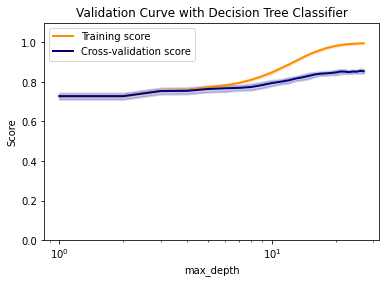

In [13]:
param_range               = np.arange(1, 28, 1)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(criterion='entropy', random_state=42), X_EDA_classification_train, y_EDA_classification_train, param_name="max_depth", param_range=param_range,scoring="accuracy", cv=10, n_jobs=3)
train_scores_mean         = np.mean(train_scores, axis=1)
train_scores_std          = np.std(train_scores, axis=1)
test_scores_mean          = np.mean(test_scores, axis=1)
test_scores_std           = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)

plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

In [14]:
clf = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
clf.fit(X_EDA_classification_train, y_EDA_classification_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [15]:
accuracy_scores = []

for i in range(1, 29):
    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)
    
    clf.fit(X_EDA_classification_train, y_EDA_classification_train)
    accuracy_score_n = accuracy_score(y_EDA_classification_test, clf.predict(X_EDA_classification_test))
    accuracy_scores.append(accuracy_score_n)

In [16]:
for i in range(1, 28):
    print(f'max_depth {i} : {accuracy_scores[i]:.6f}%')

max_depth 1 : 0.735266%
max_depth 2 : 0.760386%
max_depth 3 : 0.759420%
max_depth 4 : 0.776329%
max_depth 5 : 0.774396%
max_depth 6 : 0.776329%
max_depth 7 : 0.782609%
max_depth 8 : 0.798551%
max_depth 9 : 0.798068%
max_depth 10 : 0.815459%
max_depth 11 : 0.820773%
max_depth 12 : 0.821256%
max_depth 13 : 0.836715%
max_depth 14 : 0.835749%
max_depth 15 : 0.843478%
max_depth 16 : 0.852174%
max_depth 17 : 0.857971%
max_depth 18 : 0.861836%
max_depth 19 : 0.873430%
max_depth 20 : 0.866184%
max_depth 21 : 0.871498%
max_depth 22 : 0.874396%
max_depth 23 : 0.873913%
max_depth 24 : 0.873913%
max_depth 25 : 0.877778%
max_depth 26 : 0.877778%
max_depth 27 : 0.876812%


###### Cross Validation Score

In [17]:
cross_val_score(clf, X_EDA_classification_train, y_EDA_classification_train, cv=10)

array([0.83937198, 0.86956522, 0.85869565, 0.84541063, 0.8647343 ,
       0.86835749, 0.85144928, 0.84903382, 0.84643289, 0.86577993])

##### Confusion Matrix

In [18]:
y_train_pred = cross_val_predict(clf, X_EDA_classification_train, np.ravel(y_EDA_classification_train), cv=3)

print(f'True positive  : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[1, 1]}')
print(f'True negative  : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[0, 0]}')
print(f'False positive : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[0, 1]}')
print(f'False negative : {confusion_matrix(np.ravel(y_EDA_classification_train), y_train_pred)[1, 0]}')

True positive  : 3647
True negative  : 3214
False positive : 939
False negative : 478


###### Precision

In [19]:
y_test_pred = clf.predict(X_EDA_classification_test)

In [20]:
print(f'Precision: {round(precision_score(np.ravel(y_EDA_classification_test), y_test_pred) * 100, 2)}%')

Precision: 83.82%


##### Recall

In [21]:
print(f'Recall: {round(recall_score(np.ravel(y_EDA_classification_test), y_test_pred) * 100, 2)}%')

Recall: 93.8%


##### F1-Score

In [22]:
print(f'F-1 Score: {round(f1_score(np.ravel(y_EDA_classification_test), y_test_pred) * 100, 2)}%')

F-1 Score: 88.53%


##### Classification Report
Untuk melihat precision, recall, f1-score, dan accuracy dari setiap kelas secara keseluruhan.

In [23]:
print(classification_report(y_EDA_classification_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1021
           1       0.84      0.94      0.89      1049

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070



##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [24]:
y_scores = cross_val_predict(clf, X_EDA_classification_test, np.ravel(y_EDA_classification_test), cv=3)
precisions, recalls, thresholds = precision_recall_curve(y_EDA_classification_test, y_scores)

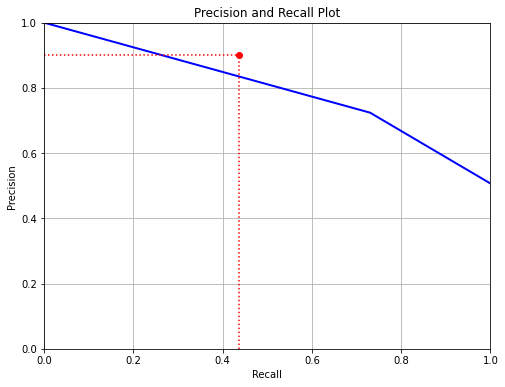

In [25]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.title('Precision and Recall Plot')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

##### ROC and AUC Curve

In [26]:
fpr, tpr, thresholds = roc_curve(y_EDA_classification_test, y_scores)

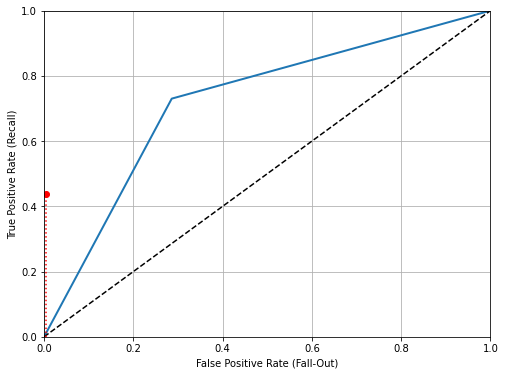

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [28]:
roc_auc_score(y_EDA_classification_test, y_scores)

0.7221125665131383

##### Predict with some feature

In [29]:
clf.predict(X_EDA_classification_test.iloc[50:60, :])

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
y_EDA_classification_test.iloc[50:60, :]

,churn
50,1
51,0
52,1
53,1
54,0
55,1
56,1
57,1
58,1
59,1


##### Save tree visualization

In [31]:
EDA_dataset_dot_data = tree.export_graphviz(clf, out_file=None)
graph                = graphviz.Source(EDA_dataset_dot_data)

graph.render("../images/oversampling/classification/EDA_dataset_decision_tree")

'../images/oversampling/classification\\EDA_dataset_decision_tree.pdf'

#### Regression

In [32]:
regressor = DecisionTreeRegressor(max_depth=20, random_state=42)
cross_val_score(regressor, X_EDA_regression_train, y_EDA_regression_train, cv=10)

array([0.99872868, 0.99827243, 0.99838319, 0.99822651, 0.99812859,
       0.99888446, 0.99763823, 0.99812554, 0.99877967, 0.99800492])

##### R Squared

In [33]:
regressor.fit(X_EDA_regression_train, y_EDA_regression_train)
r2_score(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))

0.9981550390795928

##### Explained Variance Score

In [34]:
explained_variance_score(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))

0.9981551673107171

##### Mean Absolute Error

In [35]:
mean_absolute_error(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))

0.38357487922705313

##### Root Mean Squared Error

In [36]:
mean_squared_error(y_EDA_regression_test, regressor.predict(X_EDA_regression_test))** 0.5

1.0430353327256032

###### Predict with some feature

In [37]:
regressor.predict(X_EDA_regression_test.iloc[50:60, 0:26])

array([18., 42.,  2., 18.,  7.,  1., 48.,  3., 12., 27.])

In [38]:
y_EDA_regression_test[50:60]

50    18
51    55
52     2
53    18
54     7
55     1
56    48
57     3
58    12
59    27
Name: tenure, dtype: int64

##### Save tree visualization

In [39]:
EDA_dataset_dot_data = tree.export_graphviz(regressor, out_file=None)
graph                = graphviz.Source(EDA_dataset_dot_data)

graph.render("../images/oversampling/regression/EDA_dataset_decision_tree")

'../images/oversampling/regression\\EDA_dataset_decision_tree.pdf'

### Feature Engineering Dataset

#### Classification

##### Validation Curve for hyperparameter max_depth

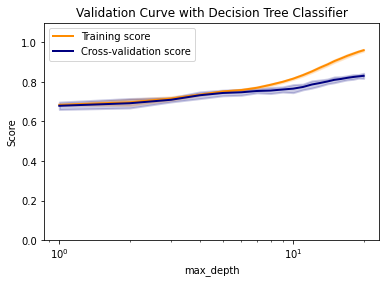

In [40]:
param_range = np.arange(1, 21, 1)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(criterion='entropy', random_state=42), X_feature_engineering_classification_train, y_feature_engineering_classification_train, param_name="max_depth", param_range=param_range,scoring="accuracy", cv=10, n_jobs=3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)

plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

In [41]:
clf = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
clf.fit(X_feature_engineering_classification_train, y_feature_engineering_classification_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [42]:
accuracy_scores = []

for i in range(1, 22):
    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)

    clf.fit(X_feature_engineering_classification_train, y_feature_engineering_classification_train)
    accuracy_score_n = accuracy_score(y_feature_engineering_classification_test, clf.predict(X_feature_engineering_classification_test))
    accuracy_scores.append(accuracy_score_n)

In [43]:
for i in range(1, 21):
    print(f'max_depth {i} : {accuracy_scores[i]:.6f}%')

max_depth 1 : 0.679227%
max_depth 2 : 0.704831%
max_depth 3 : 0.728986%
max_depth 4 : 0.742512%
max_depth 5 : 0.743961%
max_depth 6 : 0.755072%
max_depth 7 : 0.770048%
max_depth 8 : 0.764734%
max_depth 9 : 0.765217%
max_depth 10 : 0.774396%
max_depth 11 : 0.783092%
max_depth 12 : 0.790821%
max_depth 13 : 0.804831%
max_depth 14 : 0.807729%
max_depth 15 : 0.815942%
max_depth 16 : 0.825121%
max_depth 17 : 0.824638%
max_depth 18 : 0.837198%
max_depth 19 : 0.834783%
max_depth 20 : 0.840580%


##### Cross Validation Score

In [44]:
cross_val_score(clf, X_feature_engineering_classification_test, y_feature_engineering_classification_test, cv=10)

array([0.74396135, 0.71980676, 0.71980676, 0.71980676, 0.71014493,
       0.76328502, 0.7826087 , 0.71014493, 0.66183575, 0.68599034])

##### Confusion Matrix

In [45]:
y_train_pred = cross_val_predict(clf, X_feature_engineering_classification_train, np.ravel(y_feature_engineering_classification_train), cv=3)

print(f'True positive  : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[1, 1]}')
print(f'True negative  : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[0, 0]}')
print(f'False positive : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[0, 1]}')
print(f'False negative : {confusion_matrix(np.ravel(y_feature_engineering_classification_train), y_train_pred)[1, 0]}')

True positive  : 3562
True negative  : 3139
False positive : 1014
False negative : 563


##### Precision

In [46]:
y_test_pred = clf.predict(X_feature_engineering_classification_test)

In [47]:
print(f'Precision: {round(precision_score(np.ravel(y_feature_engineering_classification_test), y_test_pred) * 100, 2)}%')

Precision: 80.13%


##### Recall

In [48]:
print(f'Recall: {round(recall_score(np.ravel(y_feature_engineering_classification_test), y_test_pred) * 100, 2)}%')

Recall: 91.13%


##### F1-Score

In [49]:
print(f'F-1 Score: {round(f1_score(np.ravel(y_feature_engineering_classification_test), y_test_pred) * 100, 2)}%')

F-1 Score: 85.28%


##### Classification Report
Untuk melihat precision, recall, f1-score, dan accuracy dari setiap kelas secara keseluruhan.

In [50]:
print(classification_report(y_feature_engineering_classification_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1021
           1       0.80      0.91      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.85      0.84      0.84      2070
weighted avg       0.85      0.84      0.84      2070



##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [51]:
y_scores = cross_val_predict(clf, X_feature_engineering_classification_test, np.ravel(y_feature_engineering_classification_test), cv=3,)
precisions, recalls, thresholds = precision_recall_curve(y_feature_engineering_classification_test, y_scores)

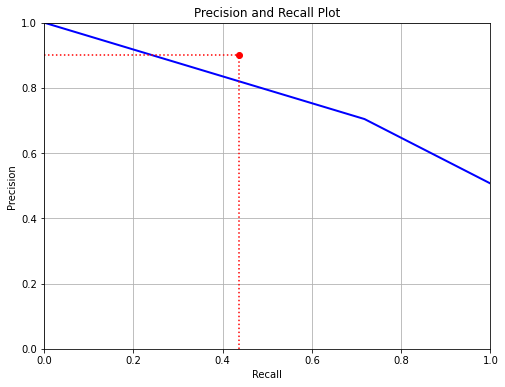

In [52]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.title('Precision and Recall Plot')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

##### ROC and AUC Curve

In [53]:
fpr, tpr, thresholds = roc_curve(y_feature_engineering_classification_test, y_scores)

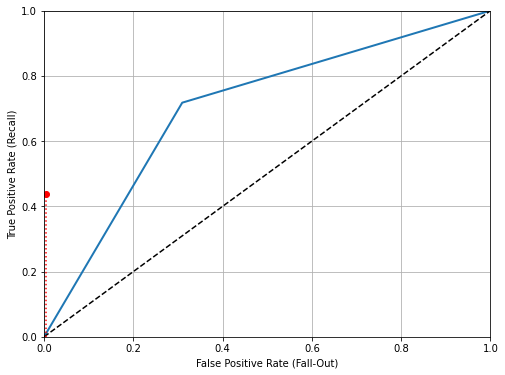

In [54]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [55]:
roc_auc_score(y_feature_engineering_classification_test, y_scores)

0.7041630058569842

##### Predict with some feature

In [56]:
clf.predict(X_feature_engineering_classification_test.iloc[50:60, :])

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [57]:
y_feature_engineering_classification_test.iloc[50:60, :]

,churn
50,1
51,0
52,1
53,1
54,0
55,1
56,1
57,1
58,1
59,1


##### Save visualization tree

In [58]:
feature_engineering_dataset_dot_data = tree.export_graphviz(clf, out_file=None)
graph                                = graphviz.Source(feature_engineering_dataset_dot_data)

graph.render("../images/oversampling/classification/feature_engineering_dataset_decision_tree")

'../images/oversampling/classification\\feature_engineering_dataset_decision_tree.pdf'

#### Regression

In [59]:
regressor = DecisionTreeRegressor(max_depth=20, random_state=42)
cross_val_score(regressor, X_feature_engineering_regression_train, y_feature_engineering_regression_train, cv=10)

array([0.99894598, 0.99864772, 0.99877618, 0.99882661, 0.99642218,
       0.99914976, 0.99923634, 0.99894156, 0.99922284, 0.99844758])

##### R Squared

In [60]:
regressor.fit(X_feature_engineering_regression_train, y_feature_engineering_regression_train)
r2_score(y_feature_engineering_regression_test, regressor.predict(X_feature_engineering_regression_test))

0.9987260593999853

##### Explained variance score

In [61]:
explained_variance_score(y_feature_engineering_regression_test, regressor.predict(X_feature_engineering_regression_test))

0.9987260597957603

##### Mean Absolute Error

In [62]:
mean_absolute_error(y_feature_engineering_regression_test, regressor.predict(X_feature_engineering_regression_test))

0.3038647342995169

##### Root Mean Squared Error

In [63]:
mean_squared_error(y_feature_engineering_regression_test, regressor.predict(X_feature_engineering_regression_test))** 0.5

0.8667224062343138

##### Predict with some feature

In [64]:
regressor.predict(X_feature_engineering_regression_test.iloc[50:60, 0:19])

array([18., 42.,  2., 18.,  7.,  1., 48.,  3., 12., 27.])

In [65]:
y_feature_engineering_regression_test[50:60]

,tenure
50,18
51,55
52,2
53,18
54,7
55,1
56,48
57,3
58,12
59,27


##### Save visualization tree

In [66]:
feature_engineering_dataset_dot_data = tree.export_graphviz(regressor, out_file=None)
graph                                = graphviz.Source(feature_engineering_dataset_dot_data)

graph.render("../images/oversampling/regression/feature_engineering_dataset_decision_tree")

'../images/oversampling/regression\\feature_engineering_dataset_decision_tree.pdf'

### PCA Dataset

#### Classification

##### Validation Curve for hyperparameter max_depth

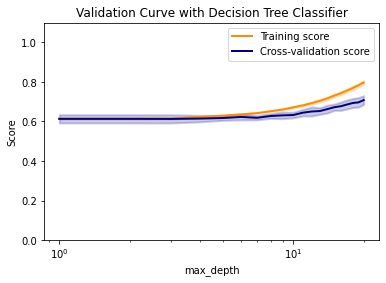

In [67]:
param_range = np.arange(1, 21, 1)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(criterion='entropy', random_state=42), X_PCA_classification_train, y_PCA_classification_train, param_name="max_depth", param_range=param_range,scoring="accuracy", cv=10, n_jobs=3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)

plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

In [68]:
clf = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
clf.fit(X_PCA_classification_train, y_PCA_classification_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [69]:
accuracy_scores = []

for i in range(1, 22):
    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)

    clf.fit(X_PCA_classification_train, y_PCA_classification_train)
    accuracy_score_n = accuracy_score(y_PCA_classification_test, clf.predict(X_PCA_classification_test))
    
    accuracy_scores.append(accuracy_score_n)

In [70]:
for i in range(1, 21):
    print(f'max_depth {i} : {accuracy_scores[i]:.6f}%')

max_depth 1 : 0.610145%
max_depth 2 : 0.610145%
max_depth 3 : 0.619807%
max_depth 4 : 0.621256%
max_depth 5 : 0.630435%
max_depth 6 : 0.628986%
max_depth 7 : 0.634783%
max_depth 8 : 0.632367%
max_depth 9 : 0.644928%
max_depth 10 : 0.644928%
max_depth 11 : 0.643478%
max_depth 12 : 0.654589%
max_depth 13 : 0.664251%
max_depth 14 : 0.667150%
max_depth 15 : 0.669082%
max_depth 16 : 0.682126%
max_depth 17 : 0.694686%
max_depth 18 : 0.705797%
max_depth 19 : 0.702899%
max_depth 20 : 0.718357%


##### Cross Validation Score

In [71]:
cross_val_score(clf, X_PCA_classification_test, y_PCA_classification_test, cv=10)

array([0.61352657, 0.61835749, 0.62318841, 0.64251208, 0.647343  ,
       0.64251208, 0.64251208, 0.59903382, 0.67149758, 0.60869565])

##### Precision

In [72]:
y_test_pred = clf.predict(X_PCA_classification_test)

In [73]:
print(f'Precision: {round(precision_score(np.ravel(y_PCA_classification_test), y_test_pred) * 100, 2)}%')

Precision: 71.53%


##### Recall

In [74]:
print(f'Recall: {round(recall_score(np.ravel(y_PCA_classification_test), y_test_pred) * 100, 2)}%')

Recall: 73.78%


##### F1-Score

In [75]:
print(f'F-1 Score: {round(f1_score(np.ravel(y_PCA_classification_test), y_test_pred) * 100, 2)}%')

F-1 Score: 72.64%


##### Classification Report
Untuk melihat precision, recall, f1-score, dan accuracy dari setiap kelas secara keseluruhan.

In [76]:
print(classification_report(y_PCA_classification_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1021
           1       0.72      0.74      0.73      1049

    accuracy                           0.72      2070
   macro avg       0.72      0.72      0.72      2070
weighted avg       0.72      0.72      0.72      2070



##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [77]:
y_scores = cross_val_predict(clf, X_PCA_classification_test, np.ravel(y_PCA_classification_test), cv=3,)
precisions, recalls, thresholds = precision_recall_curve(y_PCA_classification_test, y_scores)

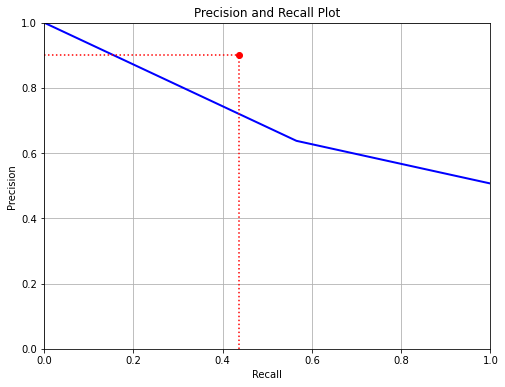

In [78]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.title('Precision and Recall Plot')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

##### Precision-Recall Trade off - Precision Recall VS Threshold Plot

In [79]:
fpr, tpr, thresholds = roc_curve(y_PCA_classification_test, y_scores)

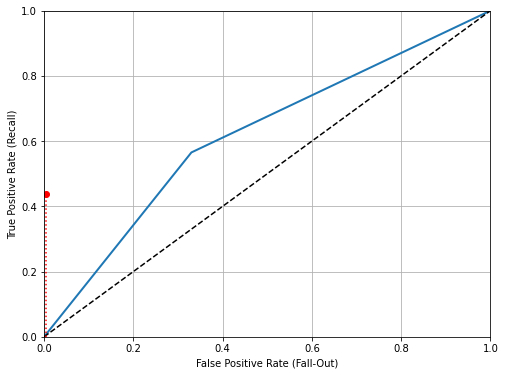

In [80]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

In [81]:
roc_auc_score(y_PCA_classification_test, y_scores)

0.6176158628757952

##### Predict with some feature

In [82]:
clf.predict(X_PCA_classification_test.iloc[50:60, :])

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [83]:
y_PCA_classification_test.iloc[50:60, :]

,churn
50,1
51,0
52,1
53,1
54,0
55,1
56,1
57,1
58,1
59,1


##### Save visualization tree

In [84]:
PCA_dataset_dot_data = tree.export_graphviz(clf, out_file=None)
graph                = graphviz.Source(PCA_dataset_dot_data)

graph.render("../images/oversampling/classification/PCA_dataset_decision_tree")

'../images/oversampling/classification\\PCA_dataset_decision_tree.pdf'

#### Regression

In [85]:
regressor = DecisionTreeRegressor(max_depth=20, random_state=42)
cross_val_score(regressor, X_PCA_regression_test, y_PCA_regression_test, cv=10)

array([0.99855607, 0.9988851 , 0.99855773, 0.9983405 , 0.99733508,
       0.99855957, 0.99735235, 0.99559999, 0.99702172, 0.99782105])

##### R Squared

In [86]:
regressor.fit(X_PCA_regression_train, y_PCA_regression_train)
r2_score(y_PCA_regression_test, regressor.predict(X_PCA_regression_test))

0.9995510485859755

##### Explained variance score

In [87]:
explained_variance_score(y_PCA_regression_test, regressor.predict(X_PCA_regression_test))

0.9995511055775863

##### Mean Absolute Error

In [88]:
mean_absolute_error(y_PCA_regression_test, regressor.predict(X_PCA_regression_test))

0.1826086956521739

##### Root Mean Squared Error

In [89]:
mean_squared_error(y_PCA_regression_test, regressor.predict(X_PCA_regression_test))** 0.5

0.5145233712057288

##### Predict with some feature

In [90]:
regressor.predict(X_PCA_regression_test.iloc[50:60, 0:26])

array([18., 54.,  2., 18.,  7.,  1., 48.,  3., 12., 27.])

In [91]:
y_PCA_regression_test[50:60]

,tenure
50,18
51,55
52,2
53,18
54,7
55,1
56,48
57,3
58,12
59,27


##### Save visualization tree

In [92]:
PCA_dataset_dot_data = tree.export_graphviz(regressor, out_file=None)
graph                = graphviz.Source(PCA_dataset_dot_data)

graph.render("../images/oversampling/regression/PCA_dataset_decision_tree")

'../images/oversampling/regression\\PCA_dataset_decision_tree.pdf'

#  Learning curves

## Classification Model

### Create function

In [93]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)): 
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_feature_engineering_classification_train, y_feature_engineering_classification_train, cv=cv, n_jobs=n_jobs,train_sizes=train_sizes,return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    fit_times_mean    = np.mean(fit_times, axis=1)
    fit_times_std     = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[0].plot(train_sizes, train_scores_mean, '-', color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, '-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, '-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, '-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

### Plotting Learning Curves

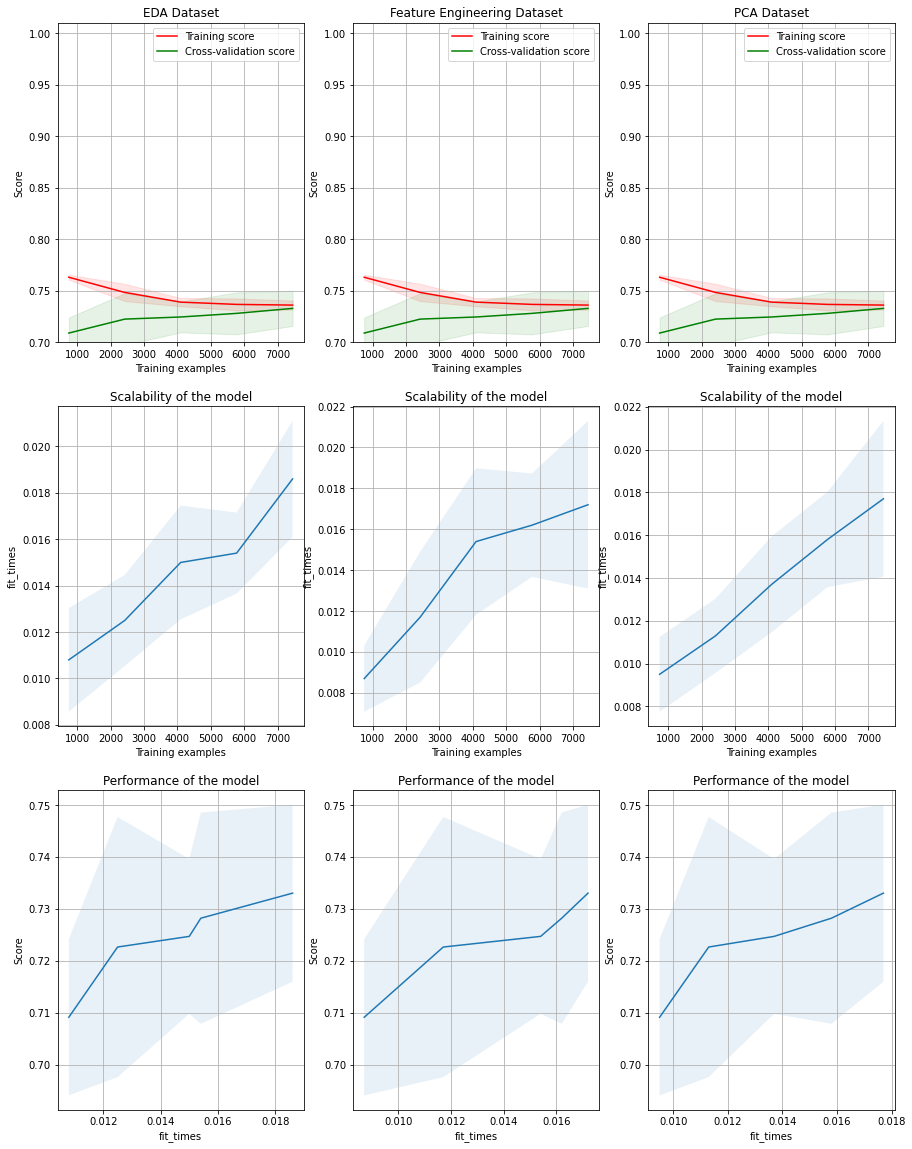

In [94]:
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
cv        = 10
estimator = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)

title = "EDA Dataset"
plot_learning_curve(estimator, title, X_EDA_classification_train, y_EDA_classification_train, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=3)

title = "Feature Engineering Dataset"
plot_learning_curve(estimator, title, X_feature_engineering_classification_train, y_feature_engineering_classification_train, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=3)

title = "PCA Dataset"
plot_learning_curve(estimator, title, X_PCA_classification_train, y_PCA_classification_train, axes=axes[:, 2], ylim=(0.7, 1.01), cv=cv, n_jobs=3)

plt.show()

### Table All Model Evaluation Summary

In [95]:
pd.DataFrame(
    {
        'Precision(%)'         : [83.82, 80.13, 71.53],
        'Recall(%)'            : [93.80, 91.13, 73.78],
        'F1-Score(%)'          : [88.53, 85.28, 72.64],
        'Accuracy(%)'          : [88.00, 84.00, 72.00],
        'ROC and AUC Score(%)' : [72.00, 70.00, 61.00]
    },
    index=['EDA', 'Feature Engineering', 'PCA']
)

,Precision(%),Recall(%),F1-Score(%),Accuracy(%),ROC and AUC Score(%)
EDA,83.82,93.80,88.53,88.0,72.0
Feature Engineering,80.13,91.13,85.28,84.0,70.0
PCA,71.53,73.78,72.64,72.0,61.0


Dari ketiga dataset yang berbeda, performa dari tiap model kurang lebih sama atau tidak memiliki perbedaan yang cukup signifikan. Ketiga model menunjukkan train score dan validation scorenya sama, dapat dilihat dari plot garis antara train score (merah) dan validation score (hijau), gapnya tidak besar. Atau dengan kata lain, <b>underfitting dan overfittingnya kecil</b>.

##  Regression model

### Create function

In [96]:
def learning_curves(plot_title, estimator, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(estimator, features, target, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error')
    
    train_scores_mean      = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    
    plt.plot(train_sizes, validation_scores_mean, '-', color="g", label='Validation error')
    plt.plot(train_sizes, train_scores_mean, '-', color="r", label='Training error', )
    
    plt.ylabel('MSE')
    plt.xlabel('Training set size')
    title = 'Learning curves ' + plot_title
    plt.title(title, y = 1.03)
    plt.legend()
    plt.ylim(0,40)

### Plotting Learning Curves

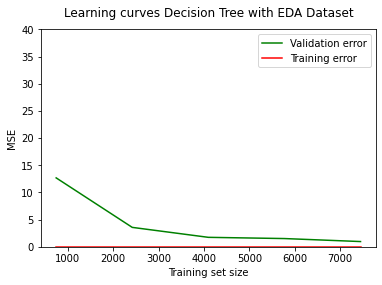

In [97]:
regressor = DecisionTreeRegressor(max_depth=20, random_state=42)

learning_curves('Decision Tree with EDA Dataset', regressor, X_EDA_regression_train, y_EDA_regression_train, np.linspace(0.1, 1.0, 5), 10)

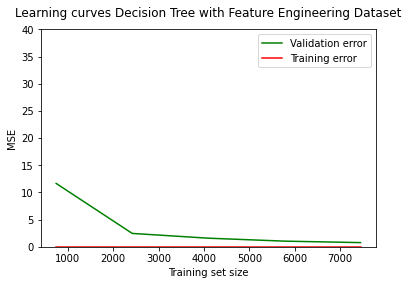

In [98]:
learning_curves('Decision Tree with Feature Engineering Dataset', regressor, X_feature_engineering_regression_train, y_feature_engineering_regression_train, np.linspace(0.1, 1.0, 5), 10)

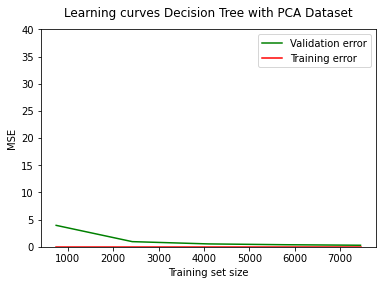

In [99]:
learning_curves('Decision Tree with PCA Dataset', regressor, X_PCA_regression_train, y_PCA_regression_train, np.linspace(0.1, 1.0, 5), 10)

Dari ketiga learning curves dengan dataset yang berbeda, dapat dilihat bahwa learning curve yang menggunakan PCA dataset, gap antara training error dengan validation error sangat kecil, walaupun model masih underfitting.

### Table All Model Evaluation Summary

In [100]:
pd.DataFrame(
    {
        'R-Squared(%)'                : [99.81, 99.87, 99.95],
        'Explained Variance Score(%)' : [99.81, 99.87, 99.95],
        'MAE'                         : [0.38, 0.30, 0.18],
        'RMSE'                        : [1.04, 0.86, 0.51],
    },
    index=['EDA', 'Feature Engineering', 'PCA']
)

,R-Squared(%),Explained Variance Score(%),MAE,RMSE
EDA,99.81,99.81,0.38,1.04
Feature Engineering,99.87,99.87,0.30,0.86
PCA,99.95,99.95,0.18,0.51


# Conclusion
- Untuk classification menggunakan model dengan dataset yang telah dioversampling menggunakan Random Over Sampling accuracy rata-rata meningkat diatas 30%, sehingga semua score dari metrik evaluasi rata-rata menjadi diatas 80%. Model masih tetap overfitting, dapat dilihat dari learning curves.
- Untuk regression, semua model menghasilkan metrik evaluasi yang memuaskan, baik dari accuracy (rata-rata diatas 90%) dan errornya (rata-rata dibawah 1). Tetapi model masih sedikit underfitting, dapat dilihat dari learning curve, garis merah training berada di bawah garis hijau validation.